#### 다중퍼셉트론 모델

Epoch 1/5
60000/60000 [==============================] - 5s - loss: 0.3206 - acc: 0.8701     
Epoch 2/5
60000/60000 [==============================] - 4s - loss: 0.1956 - acc: 0.9306     
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.1498 - acc: 0.9491     
Epoch 4/5
60000/60000 [==============================] - 4s - loss: 0.1267 - acc: 0.9575     
Epoch 5/5
60000/60000 [==============================] - 4s - loss: 0.1125 - acc: 0.9627     


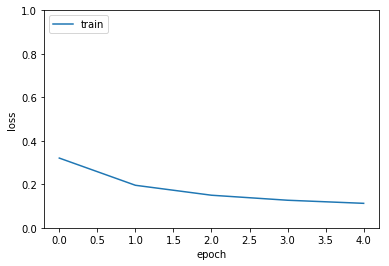

 8928/10000 [=========================>....] - ETA: 0s## evaluation loss and_metrics ##
[0.10930976346731186, 0.96340000000000003]
## yhat ##
[[ 0.99894762]]


In [7]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = y_train % 2 # 홀수는 1, 짝수는 0으로 변환
y_test = y_test % 2 # 홀수는 1, 짝수는 0으로 변환

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

#### 컨볼루션 신경망 모델

Epoch 1/5
60000/60000 [==============================] - 481s - loss: 0.3829 - acc: 0.8237   
Epoch 2/5
60000/60000 [==============================] - 778s - loss: 0.1560 - acc: 0.9418   
Epoch 3/5
60000/60000 [==============================] - 2437s - loss: 0.1067 - acc: 0.9613  
Epoch 4/5
60000/60000 [==============================] - 422s - loss: 0.0874 - acc: 0.9684   
Epoch 5/5
60000/60000 [==============================] - 486s - loss: 0.0736 - acc: 0.9741   


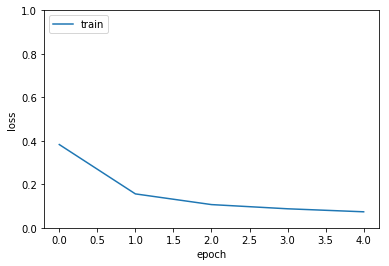

10000/10000 [==============================] - 21s    
## evaluation loss and_metrics ##
[0.034965677423402668, 0.98829999999999996]
## yhat ##
[[ 0.99994683]]


In [8]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = y_train % 2 # 홀수는 1, 짝수는 0으로 변환
y_test = y_test % 2 # 홀수는 1, 짝수는 0으로 변환

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)